<a href="https://colab.research.google.com/github/vertumno/probabilidade-analise/blob/master/Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovering The Data

A idéia neste notebook é fazer a mineração da informação entre os diferentes banco de dados.
Para isso deveremos fazer:
- Achar o id da turma, baseado no seu nome(**Resolução de **) no dataframe de turmas_ufrn_2015_2
- Com o id da turma em mãos

In [0]:
import pandas as pd

In [145]:
disciplinas_url = 'http://bit.do/componentes_curriculares_ufrn'
disciplinas = pd.read_csv(disciplinas_url, 
                          sep=';', 
                          usecols=['id_componente','codigo','nome','unidade_responsavel'])
disciplinas.head()

,id_componente,codigo,nome,unidade_responsavel
0,18643,MUT508,COMPOSIÇÃO EM MÚSICA POPULAR III,ESCOLA DE MÚSICA
1,18644,MUT516,CO-REPETIÇÃO,ESCOLA DE MÚSICA
2,18645,MUT520,CONTRABAIXO ACÚSTICO I,ESCOLA DE MÚSICA
3,18646,MUT165,PIANO COMPLEMENTAR I,ESCOLA DE MÚSICA
4,18647,MUT167,PIANO COMPLEMENTAR III,ESCOLA DE MÚSICA


In [147]:
turmas_url = 'http://bit.do/turmas_ufrn_2015_2'
turmas = pd.read_csv(turmas_url, sep=';')
turmas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14761 entries, 0 to 14760
Data columns (total 26 columns):
id_turma                    14761 non-null int64
codigo_turma                14761 non-null object
id_docente_interno          13903 non-null float64
id_docente_externo          858 non-null float64
observacao                  742 non-null object
id_componente_curricular    14761 non-null int64
nivel_ensino                14761 non-null object
campus_turma                10128 non-null object
local                       14510 non-null object
ano                         14761 non-null int64
periodo                     14761 non-null int64
data_inicio                 14761 non-null object
data_fim                    14761 non-null object
descricao_horario           13034 non-null object
total_solicitacoes          12339 non-null float64
capacidade_aluno            13336 non-null float64
tipo                        14761 non-null object
distancia                   14761 non-null ob

In [0]:
notas_url = 'http://bit.do/notas_ufrn_2015_2'
notas = pd.read_csv(notas_url, sep=';')


In [154]:
rpmti_turmas_id = turmas[turmas['id_componente_curricular'] == 55031]['id_turma']
rpmti_turmas = pd.DataFrame()
print(rpmti_turmas_id)
for it in rpmti_turmas_id:
      frames = [notas[notas['id_turma'] == it]]
      rpmti_turmas = pd.concat(frames)
      

rpmti_turmas.info()

3461    57565214
3462    57565214
3471    57565222
3472    57565222
3474    57565224
3475    57565224
Name: id_turma, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 189881 to 518901
Data columns (total 11 columns):
id_turma               196 non-null int64
discente               196 non-null object
id_curso               196 non-null float64
unidade                186 non-null float64
nota                   172 non-null float64
reposicao              186 non-null object
faltas_unidade         186 non-null float64
media_final            168 non-null float64
numero_total_faltas    186 non-null float64
descricao              196 non-null object
Unnamed: 10            0 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 18.4+ KB


### A idéia é passar como parâmetro na construção do objeto o ano/período da turma a ser examinada.

```python
      turmas_2015_2 = Turmas('2015_2')
```


**O método: ** 
```python
      read_data(self)
```
- Pode gerar erros ou se tornar lento por conta da leitura dos dados serem diretos do servidor.
- Precisa ainda refazer os links ao modo como é usado na variavel cursos_url, para tirar a dependência do bit.do
- Precisa também averiguar a veracidade das informações geradas e testar com outros anos.

In [0]:

class Turmas(object):
  def __init__(self, searched_year):
    self.turmas_url = 'http://bit.do/turmas_ufrn_'+searched_year
    self.notas_url = 'http://bit.do/notas_ufrn_'+searched_year
    self.turmas = pd.DataFrame()
    self.notas = pd.DataFrame()
    self.bti_rpmti_turmas = pd.DataFrame()
   
  def read_data(self):
    self.turmas = pd.read_csv(turmas_url, sep=';')
    self.notas = pd.read_csv(notas_url, sep=';')
   
  def set_id_componente(self):
    disciplinas_url = 'http://bit.do/componentes_curriculares_ufrn'
    disciplinas = pd.read_csv(disciplinas_url, sep=';', usecols=['id_componente','codigo','nome','unidade_responsavel'])
    
    self.id_componente = int(disciplinas[disciplinas['nome'] == 'RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI']['id_componente'])
    
  def set_id_curso(self):
    cursos_url = 'http://dados.ufrn.br/dataset/02526b96-cf40-4507-90b0-3afe5ddd53e7/resource/a10bc434-9a2d-491a-ae8c-41cf643c35bc/download/cursos-de-graduacao.csv'
    cursos_url = pd.read_csv(cursos_url, sep=';')
    
    self.id_curso = int(cursos_url[cursos_url['nome'] == 'TECNOLOGIA DA INFORMAÇÃO']['id_curso'])
  
  def set_turmas_stats(self):
    # id_turma é o código das turmas do rpmti baseada na informação do id_componente.
    self.id_turmas = self.turmas[self.turmas['id_componente_curricular'] == self.id_componente]['id_turma'].unique()
    # Agrego todas as turmas ministradas no curso do bti em um único dataframe.
    self.all_bti_turmas = self.notas[self.notas['id_curso'] == self.id_curso]
    
    # Separo no dataframe de todas as turmas do bti as unicas que batem com o id_turma e 
    # Concateno estes em um dataframe referente a todas as turmas de rpmti do período passado como parâmetro.
    for it in self.id_turmas:
      frames = [self.all_bti_turmas[self.all_bti_turmas['id_turma'] == it]]
      self.bti_rpmti_turmas = pd.concat(frames)
      
    
  
  def get_info(self):
    print(self.turmas.info())
    print(self.notas.info())
  

In [0]:
turmas_2015 = Turmas('2015_2')
turmas_2015.read_data()

In [0]:
turmas_2015.set_id_componente()
turmas_2015.set_id_curso()
turmas_2015.set_turmas_stats()

In [175]:
turmas_2015.bti_rpmti_turmas.dropna()
turmas_2015.bti_rpmti_turmas.head()

,id_turma,discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,descricao,Unnamed: 10
189881,57565224,631223ebc95c49b6bbc8aacf2119f931,92127264.0,1.0,4.1,f,0.0,6.2,4.0,APROVADO POR NOTA,NaN
189882,57565224,631223ebc95c49b6bbc8aacf2119f931,92127264.0,2.0,1.3,t,0.0,6.2,4.0,APROVADO POR NOTA,NaN
189883,57565224,631223ebc95c49b6bbc8aacf2119f931,92127264.0,3.0,7.5,f,0.0,6.2,4.0,APROVADO POR NOTA,NaN
189884,57565224,e004c3db36070496b0ea8f457bba690e,92127264.0,1.0,2.1,f,0.0,3.3,16.0,REPROVADO,NaN
189885,57565224,e004c3db36070496b0ea8f457bba690e,92127264.0,2.0,2.4,f,0.0,3.3,16.0,REPROVADO,NaN


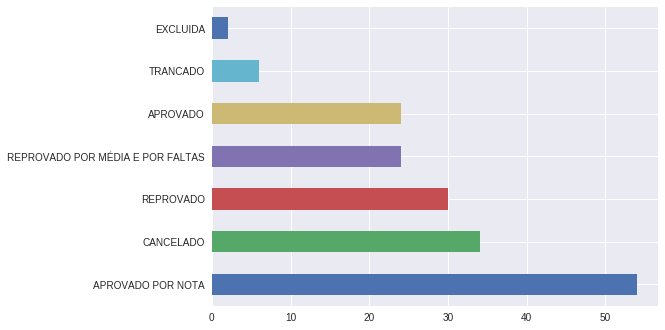

In [183]:
turmas_2015.bti_rpmti_turmas['descricao'].value_counts().plot.barh()